In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import utils
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

#import importlib
#importlib.reload(utils)

<module 'utils' from 'c:\\Users\\kearb\\Documents\\GitHub\\Python Projects\\AdvLabs\\Lab 1\\utils.py'>

In [2]:
file_path_gold = r'Data/Reflectivity/Gold Mirror baseline reflectivity.ASC'

header_lines = 25  # Adjust this number based on where your data starts

# Read the file with appropriate parameters
data_gold = pd.read_csv(
    file_path_gold,
    skiprows=header_lines,
    delim_whitespace=True,  # Change if another delimiter is used
    header=None,
    decimal=',',
    encoding='latin1'       # Use the correct encoding if needed
)

# Assign the columns to x and y
x_gold = np.array(data_gold[0])
y_gold = np.array(data_gold[1])

C:\Users\kearb\AppData\Local\Temp\ipykernel_17344\479405961.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_gold = pd.read_csv(


In [4]:
file_path_cal = r'Data/Transmittance/Water-vapor.ASC'

header_lines = 25  # Adjust this number based on where your data starts
data_cal = pd.read_csv(
    file_path_cal,
    skiprows=header_lines,
    delim_whitespace=True,  # Change if another delimiter is used
    header=None,
    decimal=',',
    encoding='latin1'       # Use the correct encoding if needed
)

# Assign the columns to x and y
x_cal = np.array(data_cal[0])
y_cal = np.array(data_cal[1])

C:\Users\kearb\AppData\Local\Temp\ipykernel_17344\3023308117.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_cal = pd.read_csv(


In [3]:
c=3*10**8
file_path_si_rf = r'Data/Reflectivity/Silicone reflectivity spectrum.ASC'

header_lines = 25  # Adjust this number based on where your data starts

data_si_rf = pd.read_csv(
    file_path_si_rf,
    skiprows=header_lines,
    delim_whitespace=True,  
    header=None,
    decimal=',',
    encoding='latin1'       
)

# Assign the columns to x and y
x_si1_rf = np.array(data_si_rf[0])
y_si1_rf = np.array(data_si_rf[1])

x_si2_rf=x_si1_rf*100*c

x_si_rf=list(x_si2_rf)
y_si_rf=list(y_si1_rf/y_gold)


C:\Users\kearb\AppData\Local\Temp\ipykernel_17344\3508381962.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_si_rf = pd.read_csv(


In [5]:
file_path_si_tr = 'Data/Transmittance/Si transmission try 2.ASC'

header_lines = 25  # Adjust this number based on where your data starts

data_si_tr = pd.read_csv(
    file_path_si_tr,
    skiprows=header_lines,
    delim_whitespace=True,  
    header=None,
    decimal=',',
    encoding='latin1'       
)

# Assign the columns to x and y
x_si1_tr = np.array(data_si_tr[0])
y_si1_tr = np.array(data_si_tr[1])

x_si_tr=list(x_si1_tr*100*c+0.15*10**14)
y_si_tr=list(y_si1_tr/y_cal)

C:\Users\kearb\AppData\Local\Temp\ipykernel_17344\3006129855.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_si_tr = pd.read_csv(


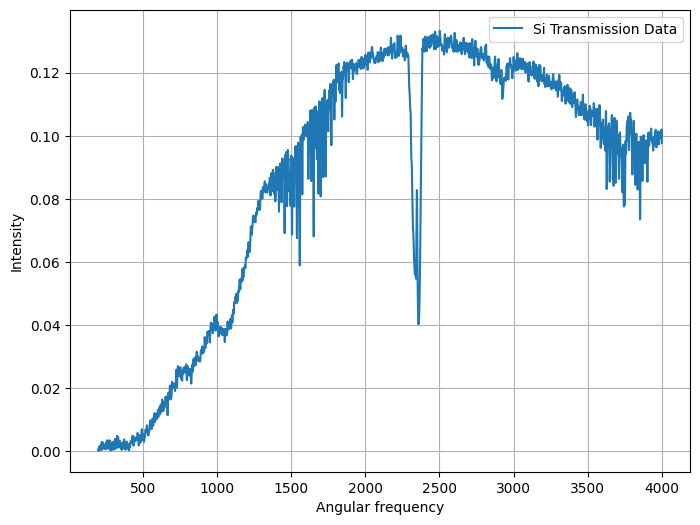

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(list(x_si1_tr), list(y_si1_tr), label='Si Transmission Data')

plt.xlabel("Angular frequency")
plt.ylabel("Intensity")
plt.legend()
plt.grid(True)
plt.show()

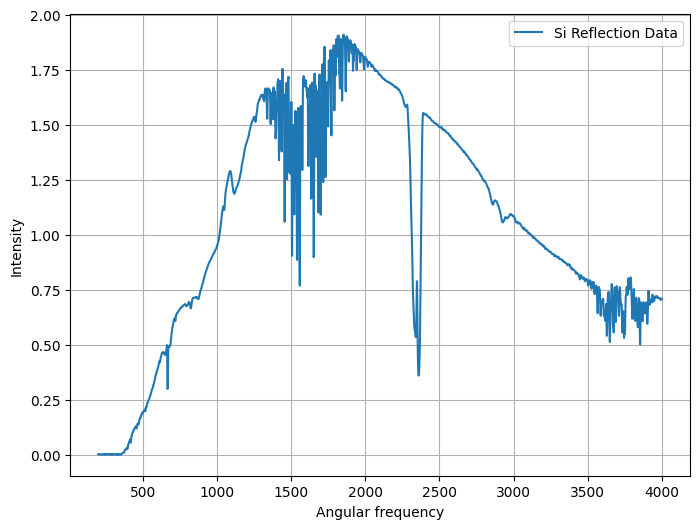

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(list(x_si1_rf), list(y_si1_rf), label='Si Reflection Data')
#plt.title("Plot of x_glass vs y_glass")
plt.xlabel("Angular frequency")
plt.ylabel("Intensity")
plt.legend()
plt.grid(True)
plt.show()

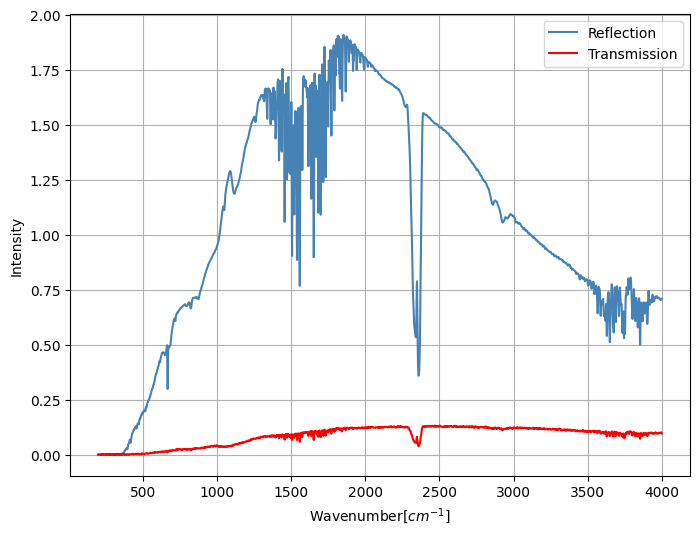

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(list(x_si1_tr), list(y_si1_rf), label='Reflection',color='steelblue')
plt.plot(list(x_si1_rf), list(y_si1_tr), label='Transmission',color='red')
#plt.title("Plot of x_glass vs y_glass")
plt.xlabel("Wavenumber[$cm^{-1}$]")
plt.ylabel("Intensity")
plt.legend()
plt.grid(True)
plt.show()

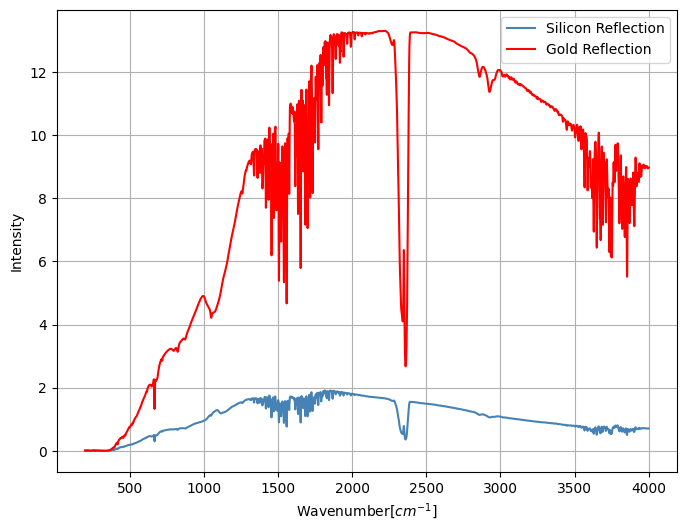

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(list(x_si1_tr), list(y_si1_rf), label='Silicon Reflection',color='steelblue')
plt.plot(list(x_gold), list(y_gold), label='Gold Reflection',color='red')
#plt.title("Plot of x_glass vs y_glass")
plt.xlabel("Wavenumber[$cm^{-1}$]")
plt.ylabel("Intensity")
plt.legend()
plt.grid(True)
plt.show()

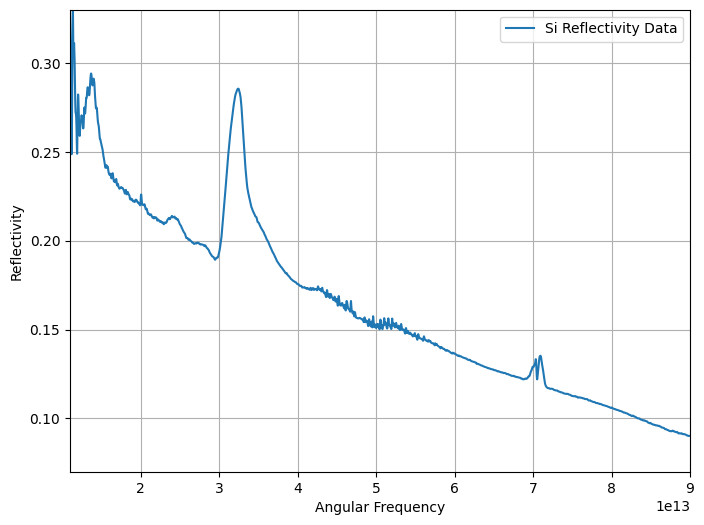

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(x_si_rf, y_si_rf, label='Si Reflectivity Data')
plt.xlabel("Angular Frequency")
plt.ylabel("Reflectivity")
plt.legend()
plt.xlim(01.1e13,9e13)
plt.ylim(0.07,0.33)
plt.grid(True)
plt.show()

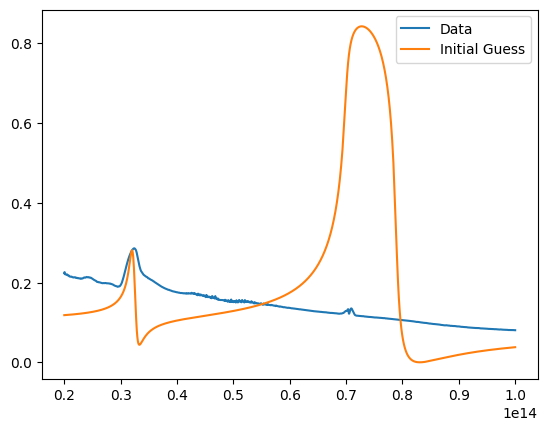

Fitted parameters:
eps_inf = 4.965e+00
S1 = 2.000e-01
w01 = 3.200e+13
g1 = 1.000e+12
S2 = 5.000e-01
w02 = 7.000e+13
g2 = 1.000e+12
S3 = 3.000e-01
w03 = 7.000e+13
g3 = 1.000e+12


C:\Users\kearb\AppData\Local\Temp\ipykernel_17344\2599114561.py:54: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(reflectivity_model_angular, w_fit, R_fit, p0=p0_scaled,


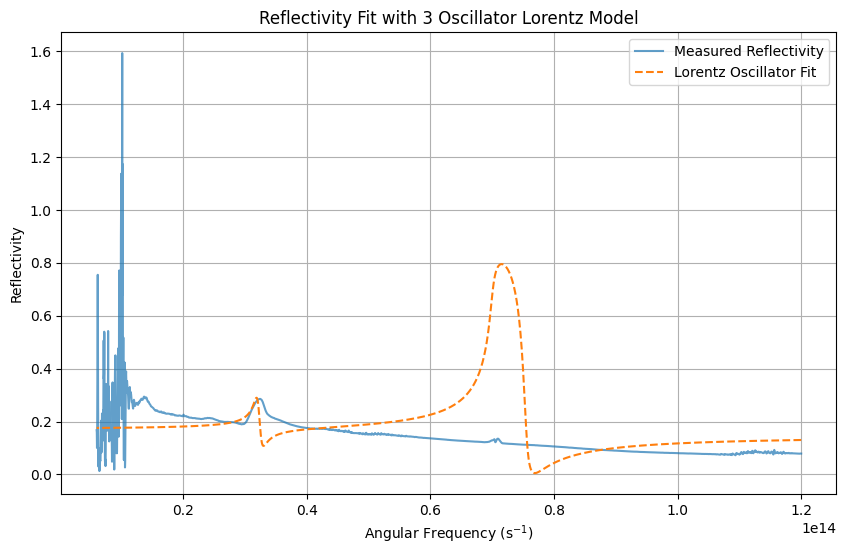

In [54]:
def dielectric_function_angular(w, eps_inf, S1, w01, g1, S2, w02, g2, S3, w03, g3):
    i = 1j
    eps = eps_inf + \
          S1 * w01**2 / (w01**2 - w**2 - i * g1 * w) + \
          S2 * w02**2 / (w02**2 - w**2 - i * g2 * w) + \
          S3 * w03**2 / (w03**2 - w**2 - i * g3 * w)
    return eps

def reflectivity_model_angular(w, *params):
    eps = dielectric_function_angular(w, *params)
    n = np.sqrt(eps)
    R = np.abs((1 - n) / (1 + n))**2
    return R.real

# Initial parameter guesses
eps_inf_init = 3.0     # Background dielectric constant
S1_init = 0.2
w01_init = 3.2e13      # Large peak at 3.2e13 s^-1
g1_init = 1e12         # Damping guess

S2_init = 0.5
w02_init = 7.0e13      # Smaller peak 1
g2_init = 1e12

S3_init = 0.3
w03_init = 7.0e13      # Smaller peak 2 (can be adjusted if you want to separate)
g3_init = 1e12

p0 = [eps_inf_init, S1_init, w01_init, g1_init, S2_init, w02_init, g2_init, S3_init, w03_init, g3_init]
x_si_rf = np.array(x_si_rf)
y_si_rf = np.array(y_si_rf)

# Restrict fit to a range that covers your data if needed
fit_mask = (x_si_rf > 2e13) & (x_si_rf < 1e14)
w_fit = x_si_rf[fit_mask]
R_fit = y_si_rf[fit_mask]


w_fit_scaled = w_fit / 1e13
p0_scaled = [
    eps_inf_init,
    S1_init, w01_init / 1e13, g1_init / 1e13,
    S2_init, w02_init / 1e13, g2_init / 1e13,
    S3_init, w03_init / 1e13, g3_init / 1e13
]
#lower_bounds = [1, 0, 1e13, 1e10, 0, 5e13, 1e10, 0, 5e13, 1e10]
#upper_bounds = [10, 10, 5e13, 1e13, 10, 1e14, 1e13, 10, 1e14, 1e13]

plt.plot(w_fit, R_fit, label='Data')
plt.plot(w_fit, reflectivity_model_angular(w_fit, *p0), label='Initial Guess')
plt.legend()
plt.show()

popt, pcov = curve_fit(reflectivity_model_angular, w_fit, R_fit, p0=p0_scaled, 
                    #bounds=(lower_bounds, upper_bounds),
                    maxfev=10000)

# Unpack fitted parameters
eps_inf, S1, w01, g1, S2, w02, g2, S3, w03, g3 = popt

# Scale frequency and damping parameters back to original units
w01 *= 1e13
g1  *= 1e13
w02 *= 1e13
g2  *= 1e13
w03 *= 1e13
g3  *= 1e13

# Now popt_scaled has the correct units
popt_scaled = [eps_inf, S1, w01, g1, S2, w02, g2, S3, w03, g3]
# Extract fitted parameters
print("Fitted parameters:")
for name, val in zip(['eps_inf','S1','w01','g1','S2','w02','g2','S3','w03','g3'], popt_scaled):
    print(f"{name} = {val:.3e}")

# Calculate fit over full wavenumber range
R_model_fit = reflectivity_model_angular(x_si_rf, *popt_scaled)

# Plot data and fit
plt.figure(figsize=(10,6))
plt.plot(x_si_rf, y_si_rf, label='Measured Reflectivity', alpha=0.7)
plt.plot(x_si_rf, R_model_fit, label='Lorentz Oscillator Fit', linestyle='--')
plt.xlabel('Angular Frequency (s$^{-1}$)')
plt.ylabel('Reflectivity')
plt.legend()
#plt.xlim(2e13, 1e14)
plt.title('Reflectivity Fit with 3 Oscillator Lorentz Model')
plt.grid(True)
plt.show()



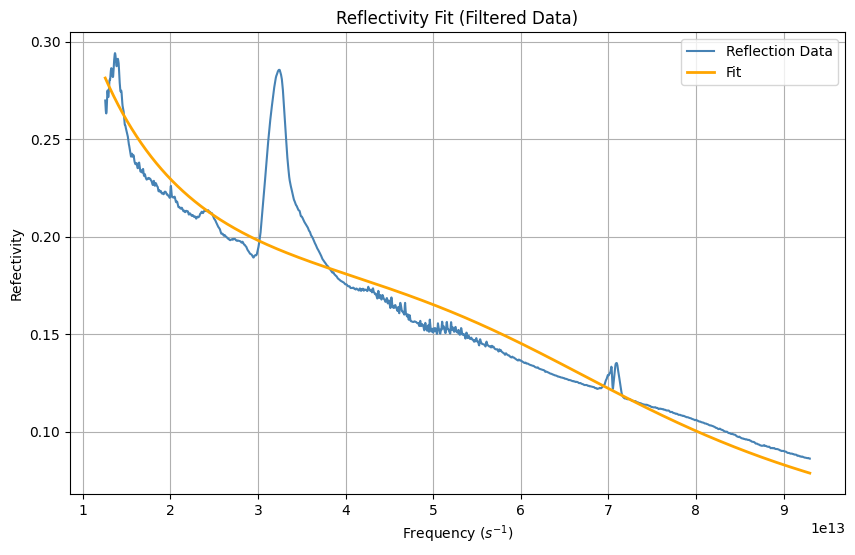

Fitted parameters:
epsilon_inf = 0.5420402212512495± 0.003990324619308879
omega_LO = 51890297558955.97± 595081358506.5726
omega_TO = 5055778777.494482± 436675536946101.4
gamma = -56490733224864.51± 596337943105.4365


In [55]:
def R_model(omega,epsilon_inf,omega_LO, omega_TO, gamma):
    
    kai_l=(omega_LO**2-omega_TO**2)/(omega_TO**2-(omega)**2-1j*(omega)*gamma)
 
    n=(epsilon_inf+kai_l)**0.5
    
    reflectivity=np.abs((1-n)/(1+n))**2
    
    return reflectivity

initial_guesses = [0.01,1.2*10**13, 1.29*10**13, 2.00*10**13]  # [epsilon_inf, omega_LO, omega_TO, gamma]
#[3700:3582]
try:
    popt, pcov = curve_fit(R_model,x_si_rf[900:3582], y_si_rf[900:3582], p0=initial_guesses)

    epsilon_inf,omega_LO, omega_TO, gamma = popt
    uncertainties = np.sqrt(np.diag(pcov)) 

    x_fit = np.linspace(min(x_si_rf[900:3582]), max(x_si_rf[900:3582]), 2500)
    y_fit = R_model(x_fit, *popt)

    plt.figure(figsize=(10, 6))
    plt.plot(x_si_rf[900:3582], y_si_rf[900:3582], label='Reflection Data', markersize=4,color='steelblue')
    plt.plot(x_fit, y_fit, '-', label=f'Fit', linewidth=2,color='orange')
    plt.xlabel("Frequency $(s^{-1})$")
    plt.ylabel("Refectivity")
    plt.legend()
    plt.grid(True)
    plt.title("Reflectivity Fit (Filtered Data)")
    plt.show()

    print("Fitted parameters:")
    print(f"epsilon_inf = {epsilon_inf}± {uncertainties[0]}")
    print(f"omega_LO = {omega_LO}± {uncertainties[1]}")
    print(f"omega_TO = {omega_TO}± {uncertainties[2]}")
    print(f"gamma = {gamma}± {uncertainties[3]}")
except Exception as e:
    print(f"An error occurred: {e}")

Grid Search (R_model):   8%|▊         | 21/256 [00:01<00:10, 22.87it/s]C:\Users\kearb\AppData\Local\Temp\ipykernel_17344\2765820128.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(R_model, x_data, y_data, p0=p, maxfev=10000)
Grid Search (R_model): 100%|██████████| 256/256 [00:14<00:00, 17.81it/s]


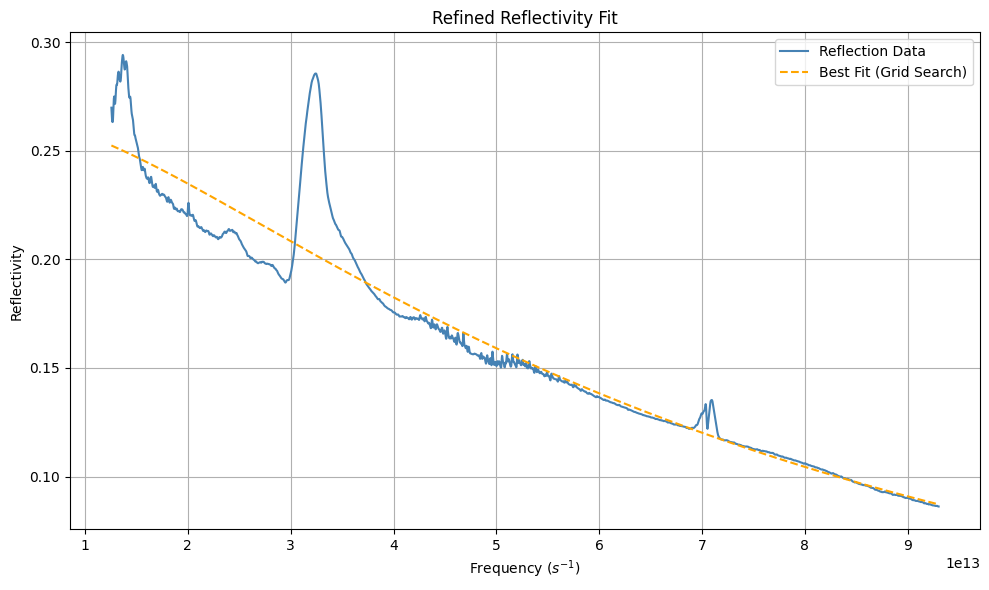


Best Fit Parameters:
 epsilon_inf = 4.836e-01
    omega_LO = -1.319e+14
    omega_TO = -1.678e+14
       gamma = 2.864e+14
Best MSE = 2.2734e-04


In [56]:
from itertools import product
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Your model ---
def R_model(omega, epsilon_inf, omega_LO, omega_TO, gamma):
    kai_l = (omega_LO**2 - omega_TO**2) / (omega_TO**2 - omega**2 - 1j * omega * gamma)
    n = np.sqrt(epsilon_inf + kai_l)
    reflectivity = np.abs((1 - n) / (1 + n))**2
    return reflectivity

# --- Your data range ---
x_data = x_si_rf[900:3582]
y_data = y_si_rf[900:3582]

# --- Parameter grid values ---
eps_inf_vals = [0.01, 0.05, 0.1, 0.2]
omega_LO_vals = np.linspace(1.1e13, 1.3e13, 4)
omega_TO_vals = np.linspace(1.2e13, 1.4e13, 4)
gamma_vals = np.linspace(1e13, 2.5e13, 4)

param_grid = list(product(eps_inf_vals, omega_LO_vals, omega_TO_vals, gamma_vals))

# --- Track best result ---
best_mse = np.inf
best_params = None
best_fit_curve = None

for p in tqdm(param_grid, desc="Grid Search (R_model)"):
    try:
        popt, _ = curve_fit(R_model, x_data, y_data, p0=p, maxfev=10000)
        y_pred = R_model(x_data, *popt)
        mse = np.mean((y_pred - y_data)**2)
        if mse < best_mse:
            best_mse = mse
            best_params = popt
            best_fit_curve = y_pred
    except:
        continue

# --- Plot the best result ---
x_fit = np.linspace(min(x_data), max(x_data), 2000)
y_fit = R_model(x_fit, *best_params)

plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Reflection Data', color='steelblue')
plt.plot(x_fit, y_fit, '--', label='Best Fit (Grid Search)', color='orange')
plt.xlabel("Frequency $(s^{-1})$")
plt.ylabel("Reflectivity")
plt.legend()
plt.grid(True)
plt.title("Refined Reflectivity Fit")
plt.tight_layout()
plt.show()

# --- Output best parameters ---
labels = ['epsilon_inf', 'omega_LO', 'omega_TO', 'gamma']
print("\nBest Fit Parameters:")
for name, val in zip(labels, best_params):
    print(f"{name:>12} = {val:.3e}")
print(f"Best MSE = {best_mse:.4e}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from multiprocessing import Pool, cpu_count
from tqdm import tqdm

# --- Load your data ---
# Replace these lines with your actual filtered x and y data
x_data = x_si_rf[900:3582]  # Frequency in Hz
y_data = y_si_rf[900:3582]  # Reflectivity

# --- Define 2-phonon model ---
def R_2phonon_model(omega, eps_inf, omega_LO1, omega_TO1, gamma1, omega_LO2, omega_TO2, gamma2):
    kai_1 = (omega_LO1**2 - omega_TO1**2) / (omega_TO1**2 - omega**2 - 1j * omega * gamma1)
    kai_2 = (omega_LO2**2 - omega_TO2**2) / (omega_TO2**2 - omega**2 - 1j * omega * gamma2)
    eps = eps_inf + kai_1 + kai_2
    n = np.sqrt(eps)
    reflectivity = np.abs((1 - n) / (1 + n))**2
    return reflectivity

# --- Error function ---
def fit_and_score(params):
    eps_inf, LO1, TO1, g1, LO2, TO2, g2 = params
    try:
        y_pred = R_2phonon_model(x_data, eps_inf, LO1, TO1, g1, LO2, TO2, g2)
        mse = np.mean((y_pred - y_data)**2)
        return mse, params
    except:
        return np.inf, params

# --- Parameter grid ---
eps_inf_vals = [0.01, 0.05, 0.1, 0.2]
omega_LO1_vals = np.linspace(1.0e13, 1.4e13, 5)
omega_TO1_vals = np.linspace(1.0e13, 1.3e13, 5)
gamma1_vals = [1e12, 3e12, 6e12]
omega_LO2_vals = np.linspace(2.5e13, 3.5e13, 5)
omega_TO2_vals = np.linspace(2.0e13, 3.2e13, 5)
gamma2_vals = [1e12, 3e12, 6e12]

param_grid = list(product(
    eps_inf_vals,
    omega_LO1_vals, omega_TO1_vals, gamma1_vals,
    omega_LO2_vals, omega_TO2_vals, gamma2_vals
))

# --- Parallel execution ---
if __name__ == '__main__':
    with Pool(cpu_count()) as pool:
        results = list(tqdm(pool.imap(fit_and_score, param_grid), total=len(param_grid)))

    # Find best result
    best_result = min(results, key=lambda x: x[0])
    best_mse, best_params = best_result

    # Plot best fit
    x_fit = np.linspace(min(x_data), max(x_data), 2000)
    y_fit = R_2phonon_model(x_fit, *best_params)

    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, label='Reflection Data', color='steelblue')
    plt.plot(x_fit, y_fit, '--', label='Best 2-Phonon Fit', color='orange')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Reflectivity")
    plt.title("2-Phonon Parallel Grid Search Fit")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nBest Fit Parameters:")
    labels = ['epsilon_inf', 'omega_LO1', 'omega_TO1', 'gamma1', 'omega_LO2', 'omega_TO2', 'gamma2']
    for name, val in zip(labels, best_params):
        print(f"{name:>12} = {val:.3e}")
    print(f"Best MSE: {best_mse:.4e}")

  0%|          | 0/22500 [00:00<?, ?it/s]

Fitted parameters:
eps_inf = 15.000
S1 = 0.242
w01 = 400.000
g1 = 5.001
S2 = 0.000
w02 = 852.571
g2 = 1.094


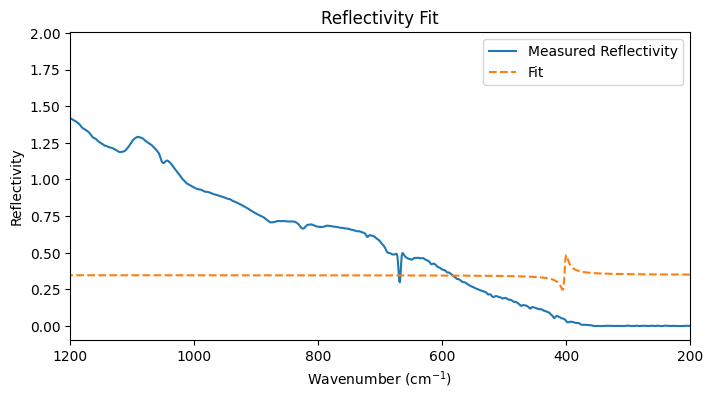

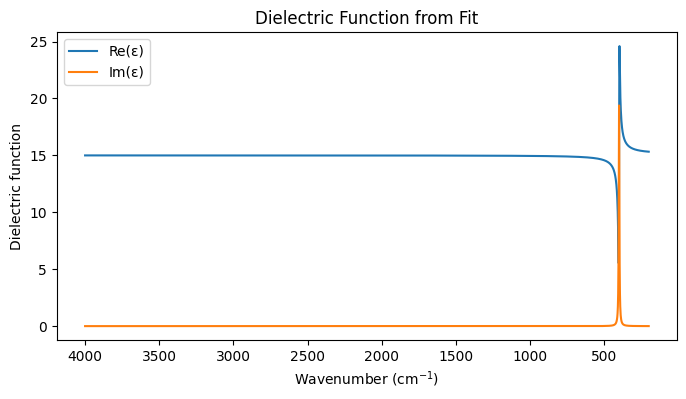

In [48]:
# Define dielectric function separately (Lorentz oscillators)
def dielectric_function(w, eps_inf, 
                        S1, w01, g1, 
                        S2, w02, g2, 
                        #S3, w03, g3
):
    i = 1j
    eps = eps_inf + \
          S1 * w01**2 / (w01**2 - w**2 - i * g1 * w) + \
          S2 * w02**2 / (w02**2 - w**2 - i * g2 * w) #+ \
    #      S3 * w03**2 / (w03**2 - w**2 - i * g3 * w)
    return eps

# Reflectivity model to fit (returns R)
def reflectivity_model(w, eps_inf,
                    S1, w01, g1,
                    S2, w02, g2,
    #                S3, w03, g3
):
    eps = dielectric_function(w, eps_inf,
                            S1, w01, g1, 
                            S2, w02, g2, 
    #                        S3, w03, g3
    )
    sqrt_eps = np.sqrt(eps)
    R = np.abs((1 - sqrt_eps) / (1 + sqrt_eps))**2
    return R.real  # real, since reflectivity is real-valued

# Initial parameter guesses

param_names = [
    'eps_inf',
    'S1', 'w01', 'g1',
    'S2', 'w02', 'g2',
    'S3', 'w03', 'g3'
]
p0 = [
    11.7,       # eps_inf — for Si in far-IR
    2.0, 600, 50,     # S1, w01, g1 — main phonon around 600 cm⁻¹
    0.5, 850, 50,     # S2, w02, g2 — small shoulder
    #0.2, 1000, 80     # S3, w03, g3 — weak high-freq bump
]

lower_bounds = [
    5.0,      # eps_inf
    0.0, 400, 0.0,   # S1, w01, g1
    0.0, 700, 0.0,   # S2, w02, g2
    #0.0, 800, 0.0    # S3, w03, g3
]
upper_bounds = [
    15.0,
    5.0, 700, 200,
    2.0, 1000, 200,
    #2.0, 1200, 500
]


wavenumber = np.array(x_si1_rf)
R_normalized = np.array(y_si1_rf)

# Optional: restrict fitting range to where phonon modes appear, e.g. 400-1300 cm^-1
fit_mask = (wavenumber > 400) & (wavenumber < 1300)
w_fit = wavenumber[fit_mask]
R_fit = R_normalized[fit_mask]

popt, pcov = curve_fit(
    reflectivity_model,
    w_fit,
    R_fit,
    p0=p0,
    bounds=(lower_bounds, upper_bounds),
    maxfev=50000
)

print("Fitted parameters:")
for name, val in zip(param_names, popt):
    print(f"{name} = {val:.3f}")

# Calculate dielectric function using fitted params
eps_fit = dielectric_function(wavenumber, *popt)

# Plot reflectivity fit
plt.figure(figsize=(8,4))
plt.plot(wavenumber, R_normalized, label='Measured Reflectivity')
plt.plot(wavenumber, reflectivity_model(wavenumber, *popt), '--', label='Fit')
plt.xlim(200, 1200)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Reflectivity')
plt.gca().invert_xaxis()
plt.legend()
plt.title('Reflectivity Fit')
plt.show()

# Plot dielectric function
plt.figure(figsize=(8,4))
plt.plot(wavenumber, eps_fit.real, label='Re(ε)')
plt.plot(wavenumber, eps_fit.imag, label='Im(ε)')
#plt.xlim(200, 800)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Dielectric function')
plt.gca().invert_xaxis()
plt.legend()
plt.title('Dielectric Function from Fit')
plt.show()
